In [ ]:
import pandas as pd
Boston = pd.read_csv("Boston_Crime.csv")
Tucson = pd.read_csv("Tucson_Crime.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Boston_Crime.csv'

In [ ]:
Boston.columns = Boston.columns.str.lower()
Boston['offense_description'] = Boston['offense_description'].str.lower()
Boston['day_of_week'] = Boston['day_of_week'].str.lower()

Boston_filtered = Boston[
    Boston['offense_description'].str.contains('assault|robbery|auto theft', na=False)
]

def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'

Boston_filtered['season'] = Boston_filtered['month'].apply(get_season)

def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

Boston_filtered['time_of_day'] = Boston_filtered['hour'].apply(get_time_of_day)

Boston_filtered['date'] = pd.to_datetime(Boston['occurred_on_date']).dt.date

Boston_filtered['offense_description'] = Boston_filtered['offense_description'].replace(
    {'assault - aggravated': 'assault', 'assault - simple': 'assault',
     'auto theft - motorcycle / scooter': 'gta',
     'auto theft - leased/rented vehicle': 'gta',
     'auto theft': 'gta'
     }, regex=True
)

Boston_filtered['city'] = 'Boston'

Boston_filtered.rename(columns={'offense_description': 'crime_type','hour':'time'}, inplace=True)

final_columns = ['crime_type', 'season', 'time_of_day', 'day_of_week', 'time', 'date', 'city']
Boston_cleaned = Boston_filtered[final_columns]

<ipython-input-64-8e4f09657661>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Boston_filtered['season'] = Boston_filtered['month'].apply(get_season)
<ipython-input-64-8e4f09657661>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Boston_filtered['time_of_day'] = Boston_filtered['hour'].apply(get_time_of_day)
<ipython-input-64-8e4f09657661>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
Boston_cleaned

,crime_type,season,time_of_day,day_of_week,time,date,city
9,assault,winter,night,saturday,0,2022-01-01,Boston
16,assault,winter,night,saturday,0,2022-01-01,Boston
17,assault,winter,night,saturday,0,2022-01-01,Boston
20,gta,winter,night,saturday,1,2022-01-01,Boston
26,assault,winter,night,saturday,1,2022-01-01,Boston
...,...,...,...,...,...,...,...
73804,assault,winter,evening,saturday,18,2022-12-31,Boston
73811,assault,winter,evening,saturday,19,2022-12-31,Boston
73823,gta,winter,evening,saturday,20,2022-12-31,Boston
73842,gta,winter,night,saturday,22,2022-12-31,Boston


In [ ]:
Boston_cleaned["crime_type"].unique()

array(['assault', 'gta', 'robbery'], dtype=object)

In [ ]:

Tucson.columns = Tucson.columns.str.lower()
Tucson.rename(columns={"ucrdescription": "crime type"}, inplace=True)

crime_filter = Tucson['crime type'].str.contains('ASSAULT|ROBBERY|GTA', case=False, na=False)
Tucson_filtered = Tucson[crime_filter]

Tucson_filtered['crime type'] = Tucson_filtered['crime type'].replace(
    {'^.*ASSAULT.*$': 'Assault', '^.*ROBBERY.*$': 'Robbery', '^.*GTA.*$': 'GTA'},
    regex=True
)

def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'
    return 'Unknown'

Tucson_filtered['season'] = Tucson_filtered['month'].apply(get_season)

def get_time_of_day(time):
    hour = int(time[:2])
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

Tucson_filtered['timeoccur'] = Tucson_filtered['timeoccur'].str.strip().replace('', '0000')
Tucson_filtered['time of day'] = Tucson_filtered['timeoccur'].apply(get_time_of_day)

Tucson_filtered['date'] = pd.to_datetime(Tucson_filtered['dateoccurred']).dt.date

Tucson_filtered['city'] = 'Tucson'

day_mapping = {
    'Mon': 'Monday',
    'Tue': 'Tuesday',
    'Wed': 'Wednesday',
    'Thu': 'Thursday',
    'Fri': 'Friday',
    'Sat': 'Saturday',
    'Sun': 'Sunday'
}
Tucson_filtered['day'] = Tucson_filtered['day'].replace(day_mapping)

Tucson_cleaned = Tucson_filtered[['date', 'crime type', 'season', 'time of day', 'timeoccur', 'day', 'city']]
Tucson_cleaned.rename(columns={"timeoccur": "time",
                               "crime type": "crime_type",
                               "time of day": "time_of_day",
                               "day":"day_of_week"}, inplace=True)
Tucson_cleaned = Tucson_cleaned.applymap(lambda x: x.lower() if isinstance(x, str) else x)



<ipython-input-68-d7cacf2ca60b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tucson_filtered['crime type'] = Tucson_filtered['crime type'].replace(
<ipython-input-68-d7cacf2ca60b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tucson_filtered['season'] = Tucson_filtered['month'].apply(get_season)
<ipython-input-68-d7cacf2ca60b>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
Tucson_cleaned["crime_type"].unique()

array(['robbery', 'assault', 'gta'], dtype=object)

In [ ]:
Tucson_cleaned

,date,crime_type,season,time_of_day,time,day_of_week,city
2,2018-01-01,robbery,winter,night,0412,monday,tucson
3,2018-01-01,assault,winter,night,0324,monday,tucson
14,2018-01-01,robbery,winter,night,0021,monday,tucson
15,2018-01-01,robbery,winter,night,0113,monday,tucson
17,2018-01-01,assault,winter,afternoon,1629,monday,tucson
...,...,...,...,...,...,...,...
181667,2024-05-01,gta,spring,morning,05:30,wednesday,tucson
181668,2024-04-29,gta,spring,night,22:00,monday,tucson
181669,2024-02-01,gta,winter,night,00:00,thursday,tucson
181677,2024-02-26,gta,winter,evening,17:00,monday,tucson


In [ ]:
Tucson_cleaned.to_csv("c_tucson.csv", index=False)
Boston_cleaned.to_csv("c_boston.csv", index=False)

In [ ]:


import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

atlanta_df = pd.read_csv("c_atlanta.csv")
baltimore_df = pd.read_csv("c_baltimore.csv")
boston_df = pd.read_csv("c_boston.csv")
cleveland_df = pd.read_csv("c_cleveland.csv")
detroit_df = pd.read_csv("c_detroit.csv")
kansascity_df = pd.read_csv("c_kansascity.csv")
louisville_df = pd.read_csv("c_louisville.csv")
memphis_df = pd.read_csv("c_memphis.csv")
sacramento_df = pd.read_csv("c_sacramento.csv")
tucson_df = pd.read_csv("c_tucson.csv")

combined_df = pd.concat([boston_df, tucson_df,atlanta_df,baltimore_df,cleveland_df,
                         detroit_df,kansascity_df,louisville_df,
                         memphis_df, sacramento_df], ignore_index=True)

label_encoders = {}
categorical_cols = ['season', 'time_of_day', 'day_of_week', 'city']
for col in categorical_cols:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])
    label_encoders[col] = le

X = combined_df[['season', 'time_of_day', 'day_of_week']]
y = combined_df['crime_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

most_common_crime = combined_df['crime_type'].value_counts().idxmax()
print(f"Most common crime type: {most_common_crime}")

Accuracy: 0.6299155627163145
Most common crime type: assault


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     assault       0.65      0.97      0.78    326467
         gta       0.45      0.13      0.20    136587
     robbery       0.39      0.08      0.13     73202

    accuracy                           0.63    536256
   macro avg       0.50      0.39      0.37    536256
weighted avg       0.57      0.63      0.54    536256



In [ ]:
boston_df["crime_type"].unique()

array(['assault', 'gta', 'robbery'], dtype=object)

In [ ]:


atlanta_df = pd.read_csv("c_atlanta.csv")

label_encoders = {}
categorical_cols = ['season', 'time_of_day', 'day_of_week']
for col in categorical_cols:
    le = LabelEncoder()
    atlanta_df[col] = le.fit_transform(atlanta_df[col])
    label_encoders[col] = le

X = atlanta_df[['season', 'time_of_day', 'day_of_week']]
y = atlanta_df['crime_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))



NameError: name 'LabelEncoder' is not defined

In [ ]:


baltimore_df = pd.read_csv("c_baltimore.csv")

label_encoders = {}
categorical_cols = ['season', 'time_of_day', 'day_of_week']
for col in categorical_cols:
    le = LabelEncoder()
    baltimore_df[col] = le.fit_transform(baltimore_df[col])
    label_encoders[col] = le

X = baltimore_df[['season', 'time_of_day', 'day_of_week']]
y = baltimore_df['crime_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))



Accuracy: 0.60915193229078
Most common crime type: assault


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     assault       0.61      1.00      0.76     50093
         gta       0.00      0.00      0.00     19301
     robbery       0.00      0.00      0.00     12840

    accuracy                           0.61     82234
   macro avg       0.20      0.33      0.25     82234
weighted avg       0.37      0.61      0.46     82234



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:


import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

boston_df = pd.read_csv("c_boston.csv")

label_encoders = {}
categorical_cols = ['season', 'time_of_day', 'day_of_week']
for col in categorical_cols:
    le = LabelEncoder()
    boston_df[col] = le.fit_transform(boston_df[col])
    label_encoders[col] = le

X = boston_df[['season', 'time_of_day', 'day_of_week']]
y = boston_df['crime_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6951898734177215
              precision    recall  f1-score   support

     assault       0.70      1.00      0.82      1373
         gta       0.00      0.00      0.00       394
     robbery       0.00      0.00      0.00       208

    accuracy                           0.70      1975
   macro avg       0.23      0.33      0.27      1975
weighted avg       0.48      0.70      0.57      1975



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:


cleveland_df = pd.read_csv("c_cleveland.csv")

label_encoders = {}
categorical_cols = ['season', 'time_of_day', 'day_of_week']
for col in categorical_cols:
    le = LabelEncoder()
    cleveland_df[col] = le.fit_transform(cleveland_df[col])
    label_encoders[col] = le

X = cleveland_df[['season', 'time_of_day', 'day_of_week']]
y = cleveland_df['crime_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7785216148547727


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     assault       0.78      1.00      0.88     72450
         gta       0.00      0.00      0.00     13993
     robbery       0.00      0.00      0.00      6618

    accuracy                           0.78     93061
   macro avg       0.26      0.33      0.29     93061
weighted avg       0.61      0.78      0.68     93061



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:


detroit_df = pd.read_csv("c_detroit.csv")

label_encoders = {}
categorical_cols = ['season', 'time_of_day', 'day_of_week']
for col in categorical_cols:
    le = LabelEncoder()
    detroit_df[col] = le.fit_transform(detroit_df[col])
    label_encoders[col] = le

X = detroit_df[['season', 'time_of_day', 'day_of_week']]
y = detroit_df['crime_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Detroit: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy for Detroit: 0.7140440124452115


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     assault       0.71      1.00      0.83    125766
         gta       0.00      0.00      0.00     40439
     robbery       0.00      0.00      0.00      9927

    accuracy                           0.71    176132
   macro avg       0.24      0.33      0.28    176132
weighted avg       0.51      0.71      0.59    176132



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:


kansascity_df = pd.read_csv("c_kansascity.csv")

label_encoders = {}
categorical_cols = ['season', 'time_of_day', 'day_of_week']
for col in categorical_cols:
    le = LabelEncoder()
    kansascity_df[col] = le.fit_transform(kansascity_df[col])
    label_encoders[col] = le

X = kansascity_df[['season', 'time_of_day', 'day_of_week']]
y = kansascity_df['crime_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Kansas City: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy for Kansas City: 0.44526111711004224
              precision    recall  f1-score   support

     assault       0.46      0.52      0.49     24824
         gta       0.46      0.59      0.52     28509
     robbery       0.39      0.24      0.29     28163

    accuracy                           0.45     81496
   macro avg       0.44      0.45      0.43     81496
weighted avg       0.44      0.45      0.43     81496



In [ ]:


louisville_df = pd.read_csv("c_louisville.csv")

label_encoders = {}
categorical_cols = ['season', 'time_of_day', 'day_of_week']
for col in categorical_cols:
    le = LabelEncoder()
    louisville_df[col] = le.fit_transform(louisville_df[col])
    label_encoders[col] = le

X = louisville_df[['season', 'time_of_day', 'day_of_week']]
y = louisville_df['crime_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Louisville: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy for Louisville: 0.7391388956458282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     assault       0.74      1.00      0.85     15193
         gta       0.00      0.00      0.00      4227
     robbery       0.00      0.00      0.00      1135

    accuracy                           0.74     20555
   macro avg       0.25      0.33      0.28     20555
weighted avg       0.55      0.74      0.63     20555



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:


memphis_df = pd.read_csv("c_memphis.csv")

label_encoders = {}
categorical_cols = ['season', 'time_of_day', 'day_of_week']
for col in categorical_cols:
    le = LabelEncoder()
    memphis_df[col] = le.fit_transform(memphis_df[col])
    label_encoders[col] = le

X = memphis_df[['season', 'time_of_day', 'day_of_week']]
y = memphis_df['crime_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Memphis: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy for Memphis: 0.7902010050251256
              precision    recall  f1-score   support

     assault       0.79      1.00      0.88      9446
         gta       0.08      0.00      0.00      1558
     robbery       0.00      0.00      0.00       936

    accuracy                           0.79     11940
   macro avg       0.29      0.33      0.29     11940
weighted avg       0.64      0.79      0.70     11940



In [ ]:


sacramento_df = pd.read_csv("c_sacramento.csv")

label_encoders = {}
categorical_cols = ['season', 'time_of_day', 'day_of_week']
for col in categorical_cols:
    le = LabelEncoder()
    sacramento_df[col] = le.fit_transform(sacramento_df[col])
    label_encoders[col] = le

X = sacramento_df[['season', 'time_of_day', 'day_of_week']]
y = sacramento_df['crime_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Sacramento: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy for Sacramento: 0.6226952599509378


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     assault       0.00      0.00      0.00      1518
         gta       0.62      1.00      0.77      7869
     robbery       0.00      0.00      0.00      3250

    accuracy                           0.62     12637
   macro avg       0.21      0.33      0.26     12637
weighted avg       0.39      0.62      0.48     12637



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
tucson_df = pd.read_csv("c_tucson.csv")

label_encoders = {}
categorical_cols = ['season', 'time_of_day', 'day_of_week']
for col in categorical_cols:
    le = LabelEncoder()
    tucson_df[col] = le.fit_transform(tucson_df[col])
    label_encoders[col] = le

X = tucson_df[['season', 'time_of_day', 'day_of_week']]
y = tucson_df['crime_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.4651258307818684


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     assault       0.46      0.75      0.57     11829
         gta       0.47      0.35      0.40     10434
     robbery       0.00      0.00      0.00      4519

    accuracy                           0.47     26782
   macro avg       0.31      0.36      0.32     26782
weighted avg       0.39      0.47      0.41     26782



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:


import pandas as pd
from sklearn.metrics import classification_report

def evaluate_city_data(df, city_name):
    """Evaluates a city's crime data and returns classification metrics."""
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.preprocessing import LabelEncoder

    label_encoders = {}
    categorical_cols = ['season', 'time_of_day', 'day_of_week']
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    X = df[['season', 'time_of_day', 'day_of_week']]
    y = df['crime_type']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

    gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb_classifier.fit(X_train, y_train)
    y_pred = gb_classifier.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    return {
        'city': city_name,
        'accuracy': accuracy,
        'precision': report.get('macro avg', {}).get('precision'),
        'recall': report.get('macro avg', {}).get('recall'),
        'f1-score': report.get('macro avg', {}).get('f1-score')
    }

cities = [
    ("Atlanta", "c_atlanta.csv"),
    ("Baltimore", "c_baltimore.csv"),
    ("Boston", "c_boston.csv"),
    ("Cleveland", "c_cleveland.csv"),
    ("Detroit", "c_detroit.csv"),
    ("Kansas City", "c_kansascity.csv"),
    ("Louisville", "c_louisville.csv"),
    ("Memphis", "c_memphis.csv"),
    ("Sacramento", "c_sacramento.csv"),
    ("Tucson", "c_tucson.csv")
]

results = []
for city_name, file_name in cities:
    try:  # Include a try-except block to handle file errors
        df = pd.read_csv(file_name)
        results.append(evaluate_city_data(df, city_name))
    except FileNotFoundError:
        print(f"Error: File '{file_name}' not found. Skipping {city_name}.")

metrics_df = pd.DataFrame(results)
metrics_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

,city,accuracy,precision,recall,f1-score
0,Atlanta,0.500578,0.322328,0.385425,0.340626
1,Baltimore,0.609152,0.203051,0.333333,0.252370
2,Boston,0.693209,0.231070,0.333333,0.272937
3,Cleveland,0.778522,0.259507,0.333333,0.291824
4,Detroit,0.714044,0.238015,0.333333,0.277723
5,Kansas City,0.445261,0.435944,0.447525,0.432644
6,Louisville,0.739139,0.246380,0.333333,0.283335
7,Memphis,0.790201,0.291459,0.333124,0.294704
8,Sacramento,0.622695,0.207565,0.333333,0.255828
9,Tucson,0.465126,0.311674,0.364619,0.323565


from matplotlib import pyplot as plt
metrics_df['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df.plot(kind='scatter', x='accuracy', y='precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

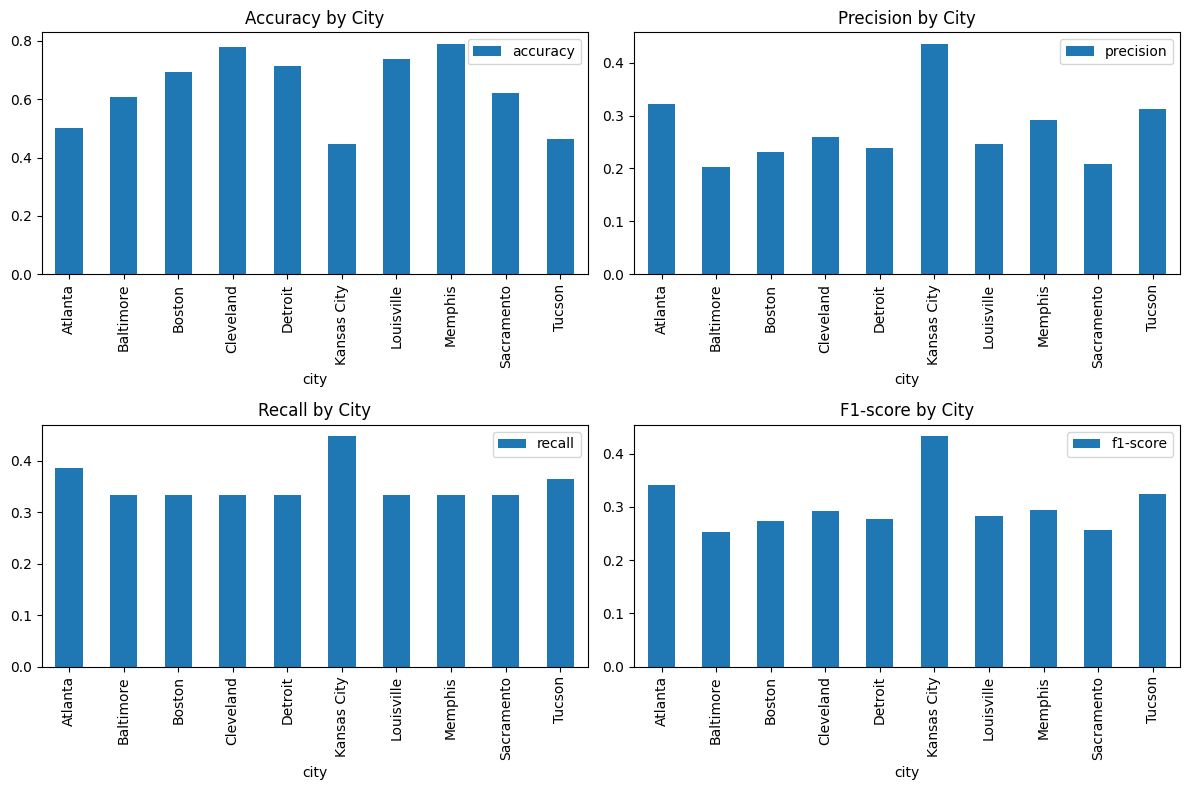

In [ ]:


import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

metrics_df.plot(x='city', y='accuracy', kind='bar', ax=axes[0,0], title='Accuracy by City')

metrics_df.plot(x='city', y='precision', kind='bar', ax=axes[0,1], title='Precision by City')

metrics_df.plot(x='city', y='recall', kind='bar', ax=axes[1,0], title='Recall by City')

metrics_df.plot(x='city', y='f1-score', kind='bar', ax=axes[1,1], title='F1-score by City')

plt.tight_layout()
plt.savefig('quad_plot.png')

plt.show()
